In [1]:
from analysis import BiasFinder
from model_data import DataManager
from settings import settings

/home/paper3/ir-bias/venv/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

%matplotlib inline

In [3]:
%%capture
bias_finder = BiasFinder(neutral_words_path=None)
sources = sorted(bias_finder.get_eligible_sources())
direct_bias = [bias_finder.get_source_bias_measurement(source) for source in sources];
normed_direct_bias = [float(i)/sum(direct_bias) for i in direct_bias]
data_manager = DataManager(settings['temp_path'], settings['experiment_save_path'])
accuracy_data = data_manager.load_models_accuracy()
accuracies = [accuracy_data[source][1] for source in sources]
pd.DataFrame({'normed_direct_bias': normed_direct_bias,
              'accuracy': accuracies},
             index=sources)

,accuracy,normed_direct_bias
Agence France-Presse,0.671290,0.172646
Associated Press Worldstream,0.695398,0.171970
LA Times/WaPo Newswire,0.618265,0.160104
New York TimesNYT: NYTSF,0.702215,0.155676
ReutersREUFF: REUTE,0.589462,0.153312
Xinua News Agency,0.591920,0.186292


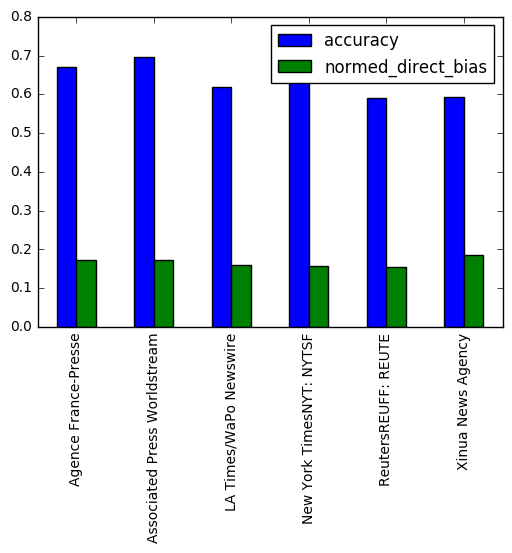

In [4]:
pd.DataFrame({'normed_direct_bias': normed_direct_bias,
              'accuracy': accuracies},
             index=sources).plot(kind='bar')

In [5]:
sp.stats.pearsonr(normed_direct_bias, accuracies)

(-0.10208921312528918, 0.84739817779017912)